# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### 1) Как критики относятся к спортивным играм?

In [3]:
# Посмотрим является ли статистически значимым отличие средней оценки спортивных игр от общей средней оценки критиков
# Уровень значимости я возьму равным 5%

H0 = 'Вероятно средняя оценка критиков спортивным играм не отличается от общей средней оценки'
H1 = 'В среднем критики выше оценивают спортивные игры'
significance = 0.05

sport_score = df[(df.Genre == 'Sports') & (df.Critic_Score.notna())].Critic_Score

print('Средняя оценка критиков спортивным играм:', sport_score.mean())
print('Средняя оценка критиков всем играм:', df.Critic_Score.mean())

t, pvalue = stats.ttest_1samp(sport_score, df.Critic_Score.mean())

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Средняя оценка критиков спортивным играм: 71.96817420435511
Средняя оценка критиков всем играм: 68.96767850559173
В среднем критики выше оценивают спортивные игры
pvalue = 1.538088875231057e-13


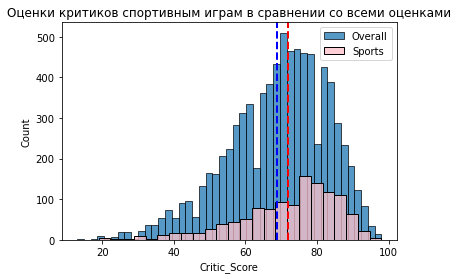

In [4]:
# Оценим для сравниваемых выборок визуально разницу в распределении оценок и средние значения

sns.histplot(df.Critic_Score, label='Overall')
plt.axvline(df.Critic_Score.mean(), color='b', ls='--', lw=2)

sns.histplot(sport_score, color='pink', label='Sports')
plt.axvline(sport_score.mean(), color='r', ls='--', lw=2)

plt.title('Оценки критиков спортивным играм в сравнении со всеми оценками')
plt.legend()
plt.show()

<div class="alert alert-success">
    
Для ответа на вопрос: `Как критики относятся к спортивным играм?` я использовал одновыборочный t-тест, в котором сравнивал выборку оценок только спортивным играм с генеральной совокупностью всех оценок критиков. Несмотря на сопоставимые значения средних оценок (~72 для спортивных игр и ~69 для всех игр) я получил очень маленькое значение $p_{value} ≈ 1,54*10^{-13}$, тем самым отвергнув нулевую гипотезу и приняв альтернативную о том, что `В среднем критики выше оценивают спортивные игры`. Разница в размере выборок очень существенная и это сказывается на чувствительности t-теста к непохожести между ними, что приводит к экстремально низкому значению pvalue при довольно близких средних значениях.
</div>

### 2) Критикам нравятся больше игры на PC или на PS4?

In [5]:
# Посмотрим есть ли статистическая значимость в разнице средних оценок для двух этих платформ на уровне значимости 5%

H0 = 'Вероятно средняя оценка игр на PC не отличается от PS4'
H1 = 'В среднем критики выше оценивают игры на PC'
significance = 0.05

pc_score = df[(df.Platform == 'PC') & (df.Critic_Score.notna())].Critic_Score
ps4_score = df[(df.Platform == 'PS4') & (df.Critic_Score.notna())].Critic_Score

print('Средняя оценка критиков играм на PC:', pc_score.mean())
print('Средняя оценка критиков играм на PS4:', ps4_score.mean())

t, pvalue = stats.ttest_ind(pc_score, ps4_score, equal_var=False)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Средняя оценка критиков играм на PC: 75.92867132867133
Средняя оценка критиков играм на PS4: 72.09126984126983
В среднем критики выше оценивают игры на PC
pvalue = 2.067249157283479e-05


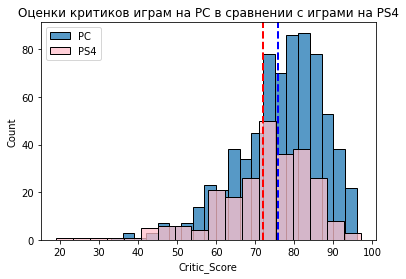

In [6]:
# Оценим для сравниваемых выборок визуально разницу в распределении оценок и средние значения

sns.histplot(pc_score, label='PC')
plt.axvline(pc_score.mean(), color='b', ls='--', lw=2)

sns.histplot(ps4_score, color='pink', label='PS4')
plt.axvline(ps4_score.mean(), color='r', ls='--', lw=2)

plt.title('Оценки критиков играм на PC в сравнении с играми на PS4')
plt.legend()
plt.show()

<div class="alert alert-success">
    
Для ответа на вопрос: `Критикам нравятся больше игры на PC или на PS4?` я использовал стандартный t-тест для двух выборок. В этот раз выборки гораздо более близкие по размеру, но при этом средние значения у них отличаются сильнее, чем в предыдущем тесте (~76 для игр на PC и ~72 для игр на PS4). Несмотря на бОльшую разницу средних я получил $p_{value} ≈ 2,07*10^{-5}$, что значительно выше значения из предыдущего теста (это как раз можно связать с тем, что в этот раз выборки сопоставимы по размеру). Тем не менее полученный pvalue все равно сильно меньше установленного уровня значимости 5%, поэтому я отвергнул нулевую гипотезу и принял альтернативную о том, что `В среднем критики выше оценивают игры на PC`.
</div>

### 3) Критикам больше нравятся стрелялки или стратегии?

In [7]:
# Посмотрим есть ли статистическая значимость в разнице средних оценок для двух этих жанров на уровне значимости 5%

H0 = 'Вероятно средняя оценка стрелялок не отличается от стратегий'
H1 = 'В среднем критики выше оценивают стратегии'
significance = 0.05

shooter_score = df[(df.Genre == 'Shooter') & (df.Critic_Score.notna())].Critic_Score
strategy_score = df[(df.Genre == 'Strategy') & (df.Critic_Score.notna())].Critic_Score

print('Средняя оценка критиков стрелялкам:', shooter_score.mean())
print('Средняя оценка критиков стратегиям:', strategy_score.mean())

t, pvalue = stats.ttest_ind(shooter_score, strategy_score, equal_var=False)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Средняя оценка критиков стрелялкам: 70.18114406779661
Средняя оценка критиков стратегиям: 72.08609271523179
В среднем критики выше оценивают стратегии
pvalue = 0.021938989522304823


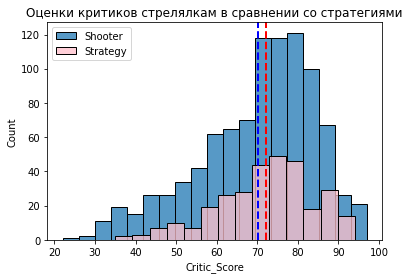

In [8]:
# Оценим для сравниваемых выборок визуально разницу в распределении оценок и средние значения

sns.histplot(shooter_score, label='Shooter')
plt.axvline(shooter_score.mean(), color='b', ls='--', lw=2)

sns.histplot(strategy_score, color='pink', label='Strategy')
plt.axvline(strategy_score.mean(), color='r', ls='--', lw=2)

plt.title('Оценки критиков стрелялкам в сравнении со стратегиями')
plt.legend()
plt.show()

<div class="alert alert-success">
    
Для ответа на вопрос: `Критикам больше нравятся стрелялки или стратегии?` я также использовал t-тест для двух выборок. Визуально представляется, что в этот раз разница в размере выборок существеннее чем в предыдущем тесте, при этом средние значения ближе друг к другу (~70 для стрелялок и ~72 для стратегий). В результате я получил $p_{value} ≈ 0,022$ - самый высокий показатель в этой серии тестов, который почти приблизился к установленному пороговому значению 5%. Таким образом я опять отвергнул нулевую гипотезу и принял альтернативную о том, что `В среднем критики выше оценивают стратегии`. Хотя результат этого теста мог бы быть и противоположным, прими я уровень значимости равным 1%.
</div>

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Приведите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);

7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;

8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [9]:
import re

In [10]:
# Загружаю датафрейм, привожу сообщения к нижнему регистру, удаляю мусорные символы, разделяю сообщения на слова

df = pd.read_csv('spam.csv')
df['message_lower'] = df.Message.str.lower()
df['words_only'] = [re.sub(r'[\W_]+', ' ', message) for message in df.message_lower]
df['splitted'] = df.words_only.str.split()
df.head()

,Category,Message,message_lower,words_only,splitted
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,..."


In [11]:
# Удаляяю стоп-слова

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
 
df['no_stopwords'] = [[word for word in message if word not in stopwords_set] for message in df.splitted]
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\79111\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Message,message_lower,words_only,splitted,no_stopwords
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]"


In [12]:
# Произвожу лемматизацию и соединяю слова обратно в текст

from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

df['lemmatized'] = [[wordnet_lemmatizer.lemmatize(word) for word in message] for message in df.no_stopwords]
df['raw_message'] = [' '.join(message) for message in df.lemmatized]
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\79111\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\79111\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Category,Message,message_lower,words_only,splitted,no_stopwords,lemmatized,raw_message
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]",nah think go usf life around though


In [13]:
# Преобразую все сообщения в вектора TF-IDF и строю матрицу коэффициентов

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(df.raw_message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

tfidf_matrix.head()

C:\Users\79111\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-success">
Получилась матрица с 8048 колонками. Это значит, что во всем массиве сообщений нашлось 8048 слов, частота встречаемости которых имеет значение для различения сообщений. В итоге для каждого сообщения мы получили набор коэффициентов, относящихся к встречающимся в нём словам. На основании этих коэффициентов можно будет построить модель логистической регрессии для классификации сообщений на спамовые и нет.
</div>

In [14]:
# Разделяю выборку на тестовую и тренировочную

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df.Category, test_size=0.3, random_state=42)

In [15]:
# Строю модель логистической регрессии

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr.predict(X_test)

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [16]:
# Оцениваю точность модели на тестовых данных

from sklearn.metrics import accuracy_score

accuracy_score(y_test, lr.predict(X_test))

0.958732057416268

<div class="alert alert-success">
Точность построенной модели логистической регрессии получилась довольно высокой. Почти в 96% случаев модель корректно классифицирует сообщения. Среди неправильно классифицированных вероятно должны встречаться как ложноположительные, так и ложноотрицательные результаты.
</div>

In [17]:
# Описываю результаты при помощи confusion_matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test), labels=['ham', 'spam'])

array([[1445,    3],
       [  66,  158]], dtype=int64)

<div class="alert alert-success">
Построенная матрица ошибок показывает, что в тестовой выборке из 1672 сообщений модель ошиблась в 69 случаях: 3 сообщения были ложно приняты за спам, и еще 66 спам-сообщений не были корректно классифицированы. Получается, что модель очень хорошо определяет неспамовые сообщения (3 ошибки из 1448). А вот с определением спама получается гораздо хуже (66 ошибок из 224), модель ошибается почти в 30% случаев. Возможно это связано с недостатком данных, и с тем, что соотношение спама к обычным сообщениям в наборе данных не так велико (приблизительно 1 к 6), а также с тем, что спамовые сообщения довольно успешно маскируются под обычные и для их определения необходимо строить более совершенные модели.
</div>

In [18]:
# Строю датафрейм, содержащий неправильно классифицированные сообщения, с указанием фактического и предсказанного

wrong_pred = df[['Message']].join(y_test, how='right')
wrong_pred['pred_category'] = lr.predict(X_test)
wrong_pred = wrong_pred[wrong_pred.Category != wrong_pred.pred_category]
wrong_pred

,Message,Category,pred_category
2952,Hey now am free you can call me.,ham,spam
881,Reminder: You have not downloaded the content ...,spam,ham
1961,Guess what! Somebody you know secretly fancies...,spam,ham
3864,Oh my god! I've found your number again! I'm s...,spam,ham
2575,Your next amazing xxx PICSFREE1 video will be ...,spam,ham
...,...,...,...
4543,FreeMsg Hi baby wow just got a new cam moby. W...,spam,ham
752,You have an important customer service announc...,spam,ham
309,TheMob> Check out our newest selection of cont...,spam,ham
495,Are you free now?can i call now?,ham,spam
